## SUPERVISE LEARNING WITH REGRESSOR IN SINGAPORE USED RESALE CAR

# Raw data -> Feature engineering --> Model Training -> model evalution -> model deployement

# What is Machine Learning why 
# There are three types *Supervise,*Unsupervise,*Reinforcement
# independent value, dependent value called Supervise Learning
# Different types of Input,independent,x,feature,
# Output,depentent,y,label/target

# Supervise Learning 
# There two types *Regressor,*Clasification
# Why preprocessing 

# Preprocessing

In [1]:
import pandas as pd
df=pd.read_csv("SG_usedcar.csv")
df.head(5)

,Brand,Type,Reg_date,Coe_left,Dep,Mileage,Road Tax,Dereg Value,COE,Engine Cap,Curb Weight,Manufactured,Transmission,OMV,ARF,Power,No. of Owners,Price,Unnamed: 18
0,BMW 5 Series 520i Highline,Luxury Sedan,28-May-13,1yr 11mths 21days COE left),15920,N.A,1210,38133,67304,1997,1610,2013,Auto,41566,45193,135,1,54000,NaN
1,Honda Vezel 1.5A X Honda Sensing,SUV,14-Oct-15,4yrs 4mths 7days COE left),10310,50000,682,31237,56001,1496,1190,2015,Auto,19775,9775,96,2,49800,NaN
2,MINI One 1.6A (New 10-yr COE),Hatchback,7-Oct-11,10yrs COE left),6280,110000,742,N.A,N.A,1598,1100,2011,Auto,18180,18180,72,3,62800,NaN
3,Hyundai Avante 1.6A (COE till 02/2029),Mid-Sized Sedan,12-Feb-09,7yrs 8mths 5days COE left),N.A,N.A,959,N.A,25727,1591,1264,2009,Auto,10763,10763,89,3,N.A,NaN
4,Suzuki Swift Sport 1.6M (COE till 12/2022),Hatchback,28-Dec-07,1yr 6mths 21days COE left),8210,203000,1030,6656,21349,1586,1060,2007,Manual,12154,13370,92,2,12800,NaN


In [2]:
df.tail(5)

,Brand,Type,Reg_date,Coe_left,Dep,Mileage,Road Tax,Dereg Value,COE,Engine Cap,Curb Weight,Manufactured,Transmission,OMV,ARF,Power,No. of Owners,Price,Unnamed: 18
4406,Mercedes-Benz C-Class C180,Luxury Sedan,20-Dec-13,2yrs 6mths 13days COE left),15240,127000,740,35772,73989,1595,1485,2013,Auto,29525,28335,115,4,52828,NaN
4407,Mazda 3 1.5A Sunroof,Mid-Sized Sedan,7-Dec-17,6yrs 6mths COE left),9340,40200,682,35419,42801,1496,1310,2017,Auto,15108,10108,88,3,65800,NaN
4408,Toyota Hiace 2.5A (COE till 02/2022),Bus/Mini Bus,8-Feb-07,8mths 1day COE left),26410,N.A,N.A,3269,24252,2494,1800,2006,Auto,N.A,27970,6,N.A,17800,NaN
4409,Subaru Forester 2.0i-L Sunroof,SUV,29-Jul-15,4yrs 1mth 22days COE left),10590,120000,1208,39265,74501,1995,1566,2015,Auto,13772,13772,110,1,50800,NaN
4410,Kia Cerato Forte 1.6A SX (New 5-yr COE),Mid-Sized Sedan,25-Apr-12,5yrs COE left),7960,91189,738,N.A,N.A,1591,1261,2012,Auto,12994,12994,91,1,39800,NaN


In [3]:
df.columns

Index(['Brand', 'Type', 'Reg_date', 'Coe_left', 'Dep', 'Mileage', 'Road Tax',
       'Dereg Value', 'COE', 'Engine Cap', 'Curb Weight', 'Manufactured',
       'Transmission', 'OMV', 'ARF', 'Power', 'No. of Owners', 'Price',
       'Unnamed: 18'],
      dtype='object')

In [4]:
df.shape

(4411, 19)

In [5]:
df.describe()

,Unnamed: 18
count,1.500000e+01
mean,4.140886e+05
std,5.044258e+05
min,1.059880e+05
25%,1.919000e+05
50%,2.068000e+05
75%,2.698880e+05
max,1.690000e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          4411 non-null   object 
 1   Type           4411 non-null   object 
 2   Reg_date       4411 non-null   object 
 3   Coe_left       4389 non-null   object 
 4   Dep            4411 non-null   object 
 5   Mileage        4411 non-null   object 
 6   Road Tax       4411 non-null   object 
 7   Dereg Value    4411 non-null   object 
 8   COE            4411 non-null   object 
 9   Engine Cap     4411 non-null   object 
 10  Curb Weight    4411 non-null   object 
 11  Manufactured   4411 non-null   object 
 12  Transmission   4411 non-null   object 
 13  OMV            4411 non-null   object 
 14  ARF            4411 non-null   object 
 15  Power          4411 non-null   object 
 16  No. of Owners  4411 non-null   object 
 17  Price          4411 non-null   object 
 18  Unnamed:

# Future Engineering

In [7]:
df.duplicated().sum()

np.int64(15)

In [8]:
df=df.drop_duplicates()

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df=df.drop(['Unnamed: 18'],axis=1)

In [11]:
df=df.drop(['Reg_date'],axis=1)

In [12]:
df.rename(columns={"COE":"COE_value"},inplace=True)
df.head(2)

,Brand,Type,Coe_left,Dep,Mileage,Road Tax,Dereg Value,COE_value,Engine Cap,Curb Weight,Manufactured,Transmission,OMV,ARF,Power,No. of Owners,Price
0,BMW 5 Series 520i Highline,Luxury Sedan,1yr 11mths 21days COE left),15920,N.A,1210,38133,67304,1997,1610,2013,Auto,41566,45193,135,1,54000
1,Honda Vezel 1.5A X Honda Sensing,SUV,4yrs 4mths 7days COE left),10310,50000,682,31237,56001,1496,1190,2015,Auto,19775,9775,96,2,49800


In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Brand']=le.fit_transform(df['Brand'])
df['Type']=le.fit_transform(df['Type'])
df['Coe_left']=le.fit_transform(df['Coe_left'])
df['Dep']=le.fit_transform(df['Dep'])
df['Mileage']=le.fit_transform(df['Mileage'])
df['Road Tax']=le.fit_transform(df['Road Tax'])
df['COE_value']=le.fit_transform(df['COE_value'])
df['Dereg Value']=le.fit_transform(df['Dereg Value'])
df['Engine Cap']=le.fit_transform(df['Engine Cap'])
df['Curb Weight']=le.fit_transform(df['Curb Weight'])
df['Manufactured']=le.fit_transform(df['Manufactured'])
df['Transmission']=le.fit_transform(df['Transmission'])
df['OMV']=le.fit_transform(df['OMV'])
df['ARF']=le.fit_transform(df['ARF'])
df['Power']=le.fit_transform(df['Power'])
df['No. of Owners']=le.fit_transform(df['No. of Owners'])
df['Price']=le.fit_transform(df['Price'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4396 entries, 0 to 4410
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Brand          4396 non-null   int64
 1   Type           4396 non-null   int64
 2   Coe_left       4396 non-null   int64
 3   Dep            4396 non-null   int64
 4   Mileage        4396 non-null   int64
 5   Road Tax       4396 non-null   int64
 6   Dereg Value    4396 non-null   int64
 7   COE_value      4396 non-null   int64
 8   Engine Cap     4396 non-null   int64
 9   Curb Weight    4396 non-null   int64
 10  Manufactured   4396 non-null   int64
 11  Transmission   4396 non-null   int64
 12  OMV            4396 non-null   int64
 13  ARF            4396 non-null   int64
 14  Power          4396 non-null   int64
 15  No. of Owners  4396 non-null   int64
 16  Price          4396 non-null   int64
dtypes: int64(17)
memory usage: 618.2 KB


In [14]:
df.isnull().sum()

Brand            0
Type             0
Coe_left         0
Dep              0
Mileage          0
Road Tax         0
Dereg Value      0
COE_value        0
Engine Cap       0
Curb Weight      0
Manufactured     0
Transmission     0
OMV              0
ARF              0
Power            0
No. of Owners    0
Price            0
dtype: int64

In [15]:
df.corr()

,Brand,Type,Coe_left,Dep,Mileage,Road Tax,Dereg Value,COE_value,Engine Cap,Curb Weight,Manufactured,Transmission,OMV,ARF,Power,No. of Owners,Price
Brand,1.000000,0.123947,-0.004144,0.009835,0.054906,0.102329,-0.079083,-0.096461,-0.036310,0.032138,-0.068642,0.103907,-0.050649,-0.136188,-0.012013,0.003659,0.039072
Type,0.123947,1.000000,0.122340,0.006028,0.117071,0.160566,-0.158792,-0.107276,0.241621,0.215762,0.083113,0.282744,0.283408,-0.022984,-0.074131,0.005634,-0.030485
Coe_left,-0.004144,0.122340,1.000000,-0.059962,-0.098086,-0.054405,-0.230763,-0.235737,0.020821,0.099708,0.448714,-0.091606,0.113739,0.147594,-0.014703,-0.150388,-0.015143
Dep,0.009835,0.006028,-0.059962,1.000000,0.174176,0.102716,0.161573,-0.235517,-0.054775,-0.146719,-0.236527,0.014332,-0.161435,-0.135254,0.198960,0.185306,0.344135
Mileage,0.054906,0.117071,-0.098086,0.174176,1.000000,0.078565,0.179543,0.005080,0.042949,0.049309,-0.003299,0.077308,0.042130,-0.046215,0.006429,-0.033667,0.257925
Road Tax,0.102329,0.160566,-0.054405,0.102716,0.078565,1.000000,-0.170593,-0.161728,-0.245034,-0.285087,0.039028,0.191202,-0.156341,-0.281757,0.371722,-0.041294,0.053751
Dereg Value,-0.079083,-0.158792,-0.230763,0.161573,0.179543,-0.170593,1.000000,0.077621,-0.067051,0.001765,-0.042491,-0.137026,-0.005802,0.125112,-0.076166,-0.013556,0.067715
COE_value,-0.096461,-0.107276,-0.235737,-0.235517,0.005080,-0.161728,0.077621,1.000000,0.136777,0.194153,0.159829,-0.053887,0.174281,0.182528,-0.167358,-0.221110,0.075252
Engine Cap,-0.036310,0.241621,0.020821,-0.054775,0.042949,-0.245034,-0.067051,0.136777,1.000000,0.587657,-0.033373,0.095685,0.379956,0.164265,-0.178315,0.086243,-0.045057
Curb Weight,0.032138,0.215762,0.099708,-0.146719,0.049309,-0.285087,0.001765,0.194153,0.587657,1.000000,0.097151,0.040556,0.563819,0.377884,-0.355028,0.020329,-0.108742


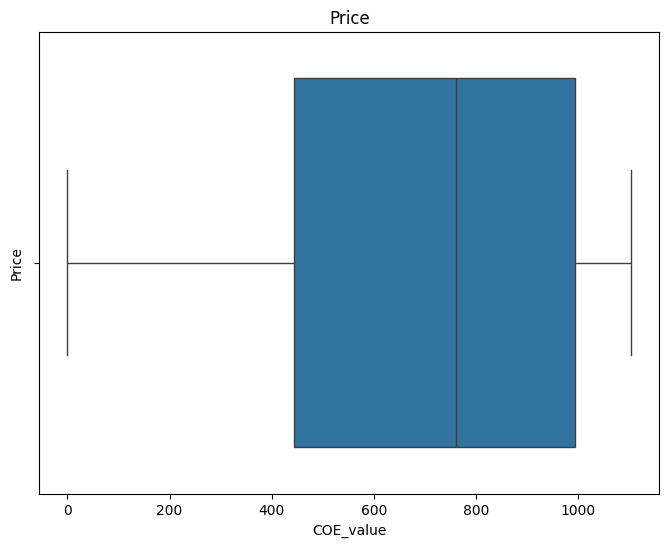

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt                 #Box Plot          
plt.figure(figsize=(8,6))                       #Find out outlayer
sns.boxplot(x='Price', data=df)                 #Using PLOTS     
plt.title("Price")
plt.xlabel("COE_value")
plt.ylabel("Price")
plt.show()

# Before outlayer Lower bound is bigger

In [17]:
Q1=df['Price'].quantile(0.25)
Q3=df['Price'].quantile(0.75)             #IQR=Intel Quantitle Range
IQR=Q3-Q1                                 #Center Line is 0.50 & IQR 
print(IQR)                                #Upper bound is 0.75
                                          #Lower bound is 0.25
                                          #IQR value is less than we dont remove outlayer

550.25


In [18]:
lower_bound=Q1-1.5*IQR
upper_bound=Q3-1.5*IQR
print(lower_bound)
print(upper_bound)

-381.625
168.625


In [19]:
df=df[~((df['Price']>=(Q1-1.5*IQR))&(df['Price']<=(Q3-1.5*IQR)))]

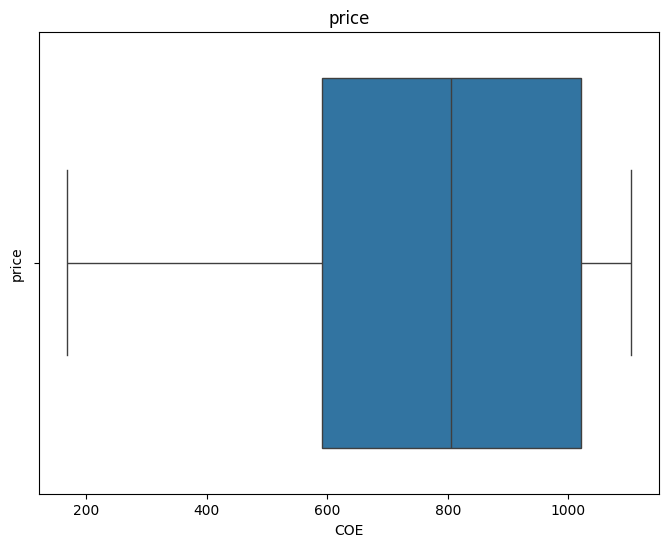

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Price', data=df)
plt.title("price")                              #After Outlayer 
plt.xlabel("COE")
plt.ylabel("price")
plt.show()

# After outlayer loewer bound is equal so outlayer is remove

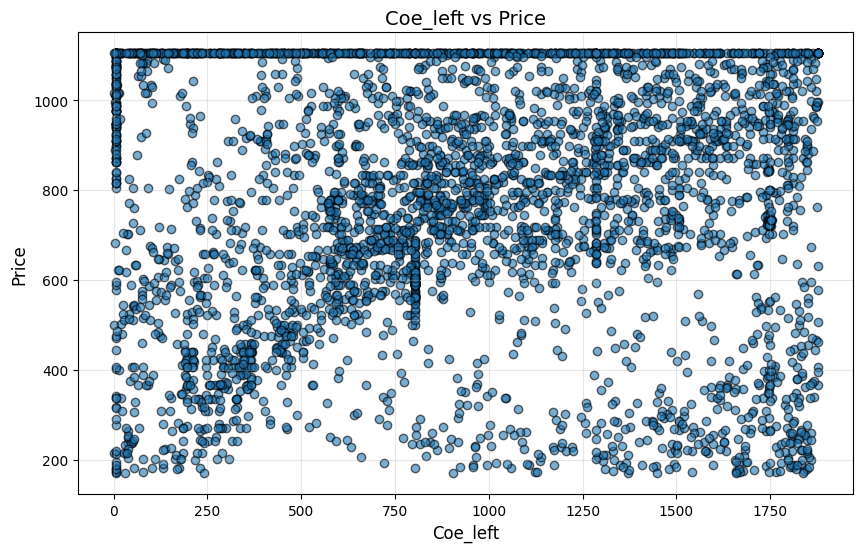

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(df["Coe_left"],df["Price"],alpha=0.6,edgecolors='k',)
plt.title("Coe_left vs Price", fontsize=14)
plt.xlabel("Coe_left", fontsize=12)                        #Scatter Plot
plt.ylabel("Price",fontsize=12)                       #NO Correlation
plt.grid(alpha=0.3)                                   #COE is Certificate of Entitlement
plt.show()

# This plot is no correlation coe 300 to 600 value is high  may be price 1000 above is expensive cars

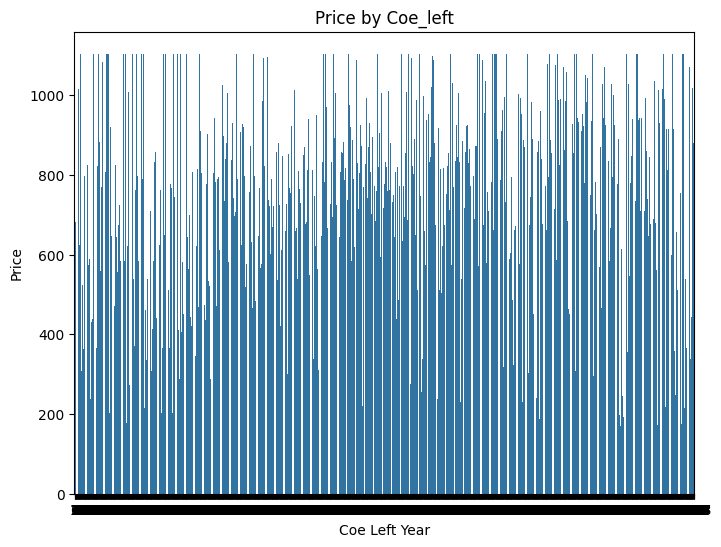

In [23]:
plt.figure(figsize=(8,6))
sns.barplot(x='Coe_left', y='Price', data=df,errorbar=None)      #BarPlot
plt.title("Price by Coe_left")                                    #Before Bins plot
plt.xlabel("Coe Left Year")
plt.ylabel("Price")
plt.show()

# This plot is so messy because year is 8.9,9.0 so the plots are undefined

                  Brand      Type  Coe_left       Dep   Mileage  Road Tax  \
Brand          1.000000  0.116363 -0.011077 -0.021513  0.076169  0.139578   
Type           0.116363  1.000000  0.127771 -0.015195  0.108155  0.172481   
Coe_left      -0.011077  0.127771  1.000000 -0.034900 -0.103174 -0.107421   
Dep           -0.021513 -0.015195 -0.034900  1.000000  0.333195  0.055593   
Mileage        0.076169  0.108155 -0.103174  0.333195  1.000000  0.138754   
Road Tax       0.139578  0.172481 -0.107421  0.055593  0.138754  1.000000   
Dereg Value   -0.069411 -0.127466 -0.222096  0.382863  0.274165 -0.147702   
COE_value     -0.077794 -0.111856 -0.275339 -0.194906 -0.058036 -0.210374   
Engine Cap    -0.006250  0.195002  0.032177 -0.077320  0.039395 -0.261044   
Curb Weight    0.041108  0.183925  0.087766 -0.126772  0.034765 -0.251416   
Manufactured  -0.071815  0.095193  0.499205 -0.143720 -0.075677 -0.028987   
Transmission   0.119510  0.329161 -0.050350  0.006586  0.140644  0.340075   

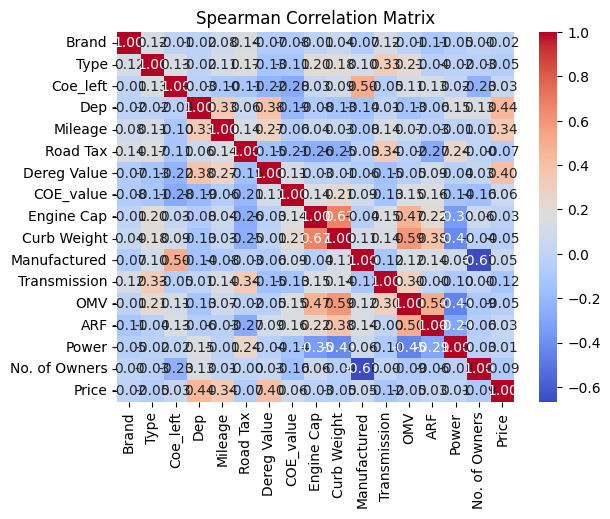

In [24]:
numeric_df = df.select_dtypes(include=['number'])
spearman_corr = numeric_df.corr(method='spearman') 
 
print(spearman_corr)
plt.Figure(figsize=(8,6))
sns.heatmap(spearman_corr, annot=True,fmt=".2f",cmap='coolwarm',cbar=True)
plt.title("Spearman Correlation Matrix")
plt.show()  

# There are no corelation between x and y 

In [ ]:
x=df.drop(['Price'],axis=1)
y=df['Price']                           

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)                                   
x 

array([[-1.49900045, -0.92680836, -1.61443533, ...,  0.97878793,
        -0.88722782, -0.79597617],
       [-0.74792772,  0.61816619, -0.43330797, ...,  1.78567919,
         1.15771916, -0.10590842],
       [-0.30621754, -1.313052  , -1.69658484, ..., -0.70128603,
         0.90284171,  0.58415933],
       ...,
       [ 1.21743442, -1.69929563,  1.0672897 , ...,  0.13667935,
         0.82578574,  3.34443034],
       [ 0.80384811,  0.61816619, -0.56657273, ..., -1.20468673,
        -1.30807199, -0.79597617],
       [-0.52293677, -0.15432109, -0.23980024, ..., -1.31655355,
         1.08066319, -0.79597617]], shape=(3942, 16))

# Split Train and Test Data

In [27]:
from sklearn.model_selection import train_test_split                      #Train and Test Split Data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Models Without Parameter

In [28]:
from sklearn.linear_model import LinearRegression
le=LinearRegression()                                        #y=mx+c-constant
le.fit(x_train,y_train)
y_pred=le.predict(x_test)                                   #Train Linear Model
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.17367307269399235


In [29]:
le=LinearRegression()
le.fit(x_test,y_test)
y_pred=le.predict(x_test)                                 #Test Linear Model
from sklearn.metrics import r2_score                      #Model is Underfit
print(r2_score(y_test,y_pred))

0.18832839313682048


In [ ]:
from sklearn.tree import DecisionTreeRegressor
de=DecisionTreeRegressor()              # start at node best feature  and thresold to split data using gini impurity entropy
de.fit(x_train,y_train)               # create number branch using untill max depth reached
y_pred=de.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.8072454843527638


In [ ]:
de=DecisionTreeRegressor()
de.fit(x_test,y_test)
y_pred=de.predict(x_test)
from sklearn.metrics import r2_score       #Model is Underfit
print(r2_score(y_test,y_pred))

1.0


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
kn.fit(x_train,y_train)
y_pred=kn.predict(x_test)                  #new data point by looking at the k colsest training point 
from sklearn.metrics import r2_score       #based on distance euclidean
print(r2_score(y_test,y_pred))             #average or weight average of neighbor
                                           #slow with large dataset

0.7073174374762452


In [ ]:
kn=KNeighborsRegressor()
kn.fit(x_test,y_test)
y_pred=kn.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))              # Model is Good

0.7307570301937978


In [34]:
from sklearn.ensemble import RandomForestRegressor
ra=RandomForestRegressor()
ra.fit(x_train,y_train)
y_pred=ra.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.8843975264907549


In [ ]:
ra=RandomForestRegressor()
ra.fit(x_test,y_test)
y_pred=ra.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))                        #Model is Underfit

0.9722535690604892


In [ ]:
from sklearn.svm import SVR
sv=SVR()
sv.fit(x_train,y_train)                         #predict continue value fitting best possible
y_pred=sv.predict(x_test)                       #with in margin of tolerance from actual value    
from sklearn.metrics import r2_score            #epsilon margin a tube or band around regression line  
print(r2_score(y_test,y_pred))

0.0926347736154699


In [ ]:
sv=SVR()
sv.fit(x_test,y_test)
y_pred=sv.predict(x_test)
from sklearn.metrics import r2_score      #Model is poor performance
print(r2_score(y_test,y_pred))

0.030650698738190263


# Model With Parameter

In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold=KFold(n_splits=10,shuffle=True,random_state=42)
results=cross_val_score(kn,x,y,cv=kfold)
print(results)
print(results.mean())

[0.69994317 0.73903813 0.73652339 0.72056771 0.7341134  0.72115751
 0.70864485 0.78781267 0.7214986  0.68739296]
0.7256692384606643


In [39]:
for train_index,test_index in kfold.split(x):
    x_train,x_test=x[train_index],x[test_index]
    y_train,y_test=y[train_index],y[test_index]
    kn.fit(x_train,y_train)
    y_pred=kn.predict(x_test)
    print(r2_score(y_test,y_pred))

0.6999431678375365
0.739038125811353
0.736523391949141
0.7205677140507026
0.734113399189534
0.7211575146782424
0.708644845012439
0.7878126684513237
0.7214985952587225
0.6873929623676485


In [40]:
for train_index,test_index in kfold.split(x):
    x_train,x_test=x[train_index],x[test_index]
    y_train,y_test=y[train_index],y[test_index]
    kn.fit(x_test,y_test)
    y_pred=kn.predict(x_test)
    print(r2_score(y_test,y_pred))

0.6442057250194659
0.6262106667377414
0.6407039067176064
0.6042882915171496
0.6521688384453452
0.6906456636863163
0.6866931613598277
0.6885897791273379
0.6768062525941718
0.6619063496308379


In [41]:
model=KNeighborsRegressor(n_neighbors=6)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(r2_score(y_test,y_pred))

0.6787195838154083


In [ ]:
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
print(r2_score(y_test,y_pred))            #Model is overfit

0.6413361109080304


# Bagging without prameter Method

In [ ]:
from sklearn.ensemble import BaggingRegressor
br=BaggingRegressor()
br.fit(x_train,y_train)                            #improve the performance and stability of model
y_pred=br.predict(x_test)                           #reduces variance train model in parallel
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9160716011717582


In [ ]:
br=BaggingRegressor()
br.fit(x_test,y_test)
y_pred=br.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))               #Model is Underfit

0.9565071210741858


# Bagging with parameter

In [45]:
from sklearn.ensemble import BaggingRegressor
bagging_model=BaggingRegressor(n_estimators=100,random_state=42,max_samples=0.8,max_features=1.0,bootstrap=True)
bagging_model.fit(x_train,y_train)
y_pred=bagging_model.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9237867376908481


In [ ]:
bagging_model=BaggingRegressor(n_estimators=100,random_state=42,max_samples=0.8,max_features=1.0,bootstrap=True)
bagging_model.fit(x_test,y_test)           #improve model diversity
y_pred=bagging_model.predict(x_test)       #sample-rows #feature - column reduce overfiting
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))               #Model is Underfit

0.9530299351848055


# Hyper Parameter Tuning Method

# GridSearchcv

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'n_neighbors':[3,4,5,6,7,8,9,10],          ##finding the best combination parameter using cross validation
    'metric':['euclidean','manhattan'],       # search strategy exhaustive every single combination   
    'metric':['euclidean','manhattan']
}
kn=KNeighborsRegressor()
kn_cv=GridSearchCV(kn,param_grid,cv=5)
kn_cv.fit(x_train,y_train)
kn_cv.best_params_

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

In [53]:
kn=KNeighborsRegressor()
kn_cv=GridSearchCV(kn,param_grid,cv=5)
kn_cv.fit(x_test,y_test)
kn_cv.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

In [54]:
model=KNeighborsRegressor(n_neighbors=4,metric='manhattan',weights='distance')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.7705057905187193


In [ ]:
model=KNeighborsRegressor(n_neighbors=5,metric='manhattan',weights='distance')
model.fit(x_test,y_test)
pred=model.predict(x_test)
from sklearn.metrics import r2_score        #Model is Generalized
print(r2_score(y_test,y_pred))

0.7705057905187193


# RandomSearchcv

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_grid={
    'n_neighbors':[1,2,3,4,5,6,7,8,9,10],   # we give random value its like range
    'weights':['uniform','distance'],       #finding the best combination parameter using cross validation
    'metric':['euclidean','manhattan']       # random sampling from parameter space picking randomly value   
}
kn=KNeighborsRegressor()
kn_cv=RandomizedSearchCV(kn,param_grid,cv=5)
kn_cv.fit(x_train,y_train)
kn_cv.best_params_

{'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan'}

In [57]:
kn=KNeighborsRegressor()
kn_cv=RandomizedSearchCV(kn,param_grid,cv=5)
kn_cv.fit(x_test,y_test)
kn_cv.best_params_

{'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan'}

In [58]:
model=KNeighborsRegressor(n_neighbors=3,metric='manhattan',weights='distance')
model.fit(x_train,y_train)
pred=model.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.7705057905187193


In [ ]:
model=KNeighborsRegressor(n_neighbors=3,metric='manhattan',weights='distance')
model.fit(x_test,y_test)
pred=model.predict(x_test)
from sklearn.metrics import r2_score          #Model is Generalized
print(r2_score(y_test,y_pred))

0.7705057905187193
